In [1]:
import os
import numpy as np
import math
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

2024-04-14 21:49:34.180463: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-14 21:49:34.440889: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-14 21:49:34.443163: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-14 21:49:35.756985: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#!unzip -q '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/archive.zip'

In [6]:
train_directory = '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/Covid19-dataset/train'
test_directory = '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/Covid19-dataset/test'

In [7]:
#num_skipped = 0
#for folder_name in (train_directory,test_directory):
#    max_images=100
 #   folder_path = os.path.join('Covid19-dataset',folder_name)
  #  for images_i,fname in enumerate(os.listdir(folder_path)):
   #     fpath = os.path.join(folder_path,fname)
    #    try:
     #       fobj = open(fpath,"rb")
      #      is_jfif = b"JFIF" in fobj.peek(10)
       # finally:
        #    fobj.close()
        #if image_i > max_images or not is_jfif:
         #   num_skipped += 1
          #  os.remove(fpath) # removes corrupted images

#print(f"Deleted {num_skipped} images.")

In [8]:
img_size = (224,224)
batch_size = 10

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    train_directory,
    validation_split=0.2,
    subset='both',
    seed = 1337,
    image_size = img_size,
    batch_size=batch_size)

Found 251 files belonging to 3 classes.
Using 201 files for training.
Using 50 files for validation.


2024-04-14 21:49:39.445316: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-14 21:49:39.445940: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from PIL import ImageFilter

In [15]:
def generate_data(directory):
    gen = ImageDataGenerator(rescale=1./255.)
    generator = gen.flow_from_directory(
        directory, batch_size=batch_size,
        shuffle=True, seed=42, class_mode='binary',
        target_size=img_size,
        classes={'Normal':0, 'Viral Pneumonia':1, 'Covid':2})
    return generator

def print_cases():
    total_images = np.concatenate([train_gen.labels, test_gen.labels])
    print('\n\n',{'Normal_cases':len(np.where(total_images==0)[0]),
      'Viral_Pneumonia_cases':len(np.where(total_images==1)[0]),
             'Covid_cases':len(np.where(total_images==2)[0])})

In [16]:
def img_plots(generator,img_num):
    features = generator[0][0][:img_num]
    labels = generator[0][1][:img_num]
    
    plt.figure(figsize=(20,15))
    for i in range(img_num):
        ax = plt.subplot(math.ceil(img_num/4),4,i+1)
        plt.imshow(features[i])
        plt.title('Normal' if labels[1]==0 else 'Viral Pneumonia' if labels[i] == 1 else 'Covid')
        plt.axis('off')

In [17]:
load_directory()

train_gen = generate_data(train_directory)
test_gen = generate_data(test_directory)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


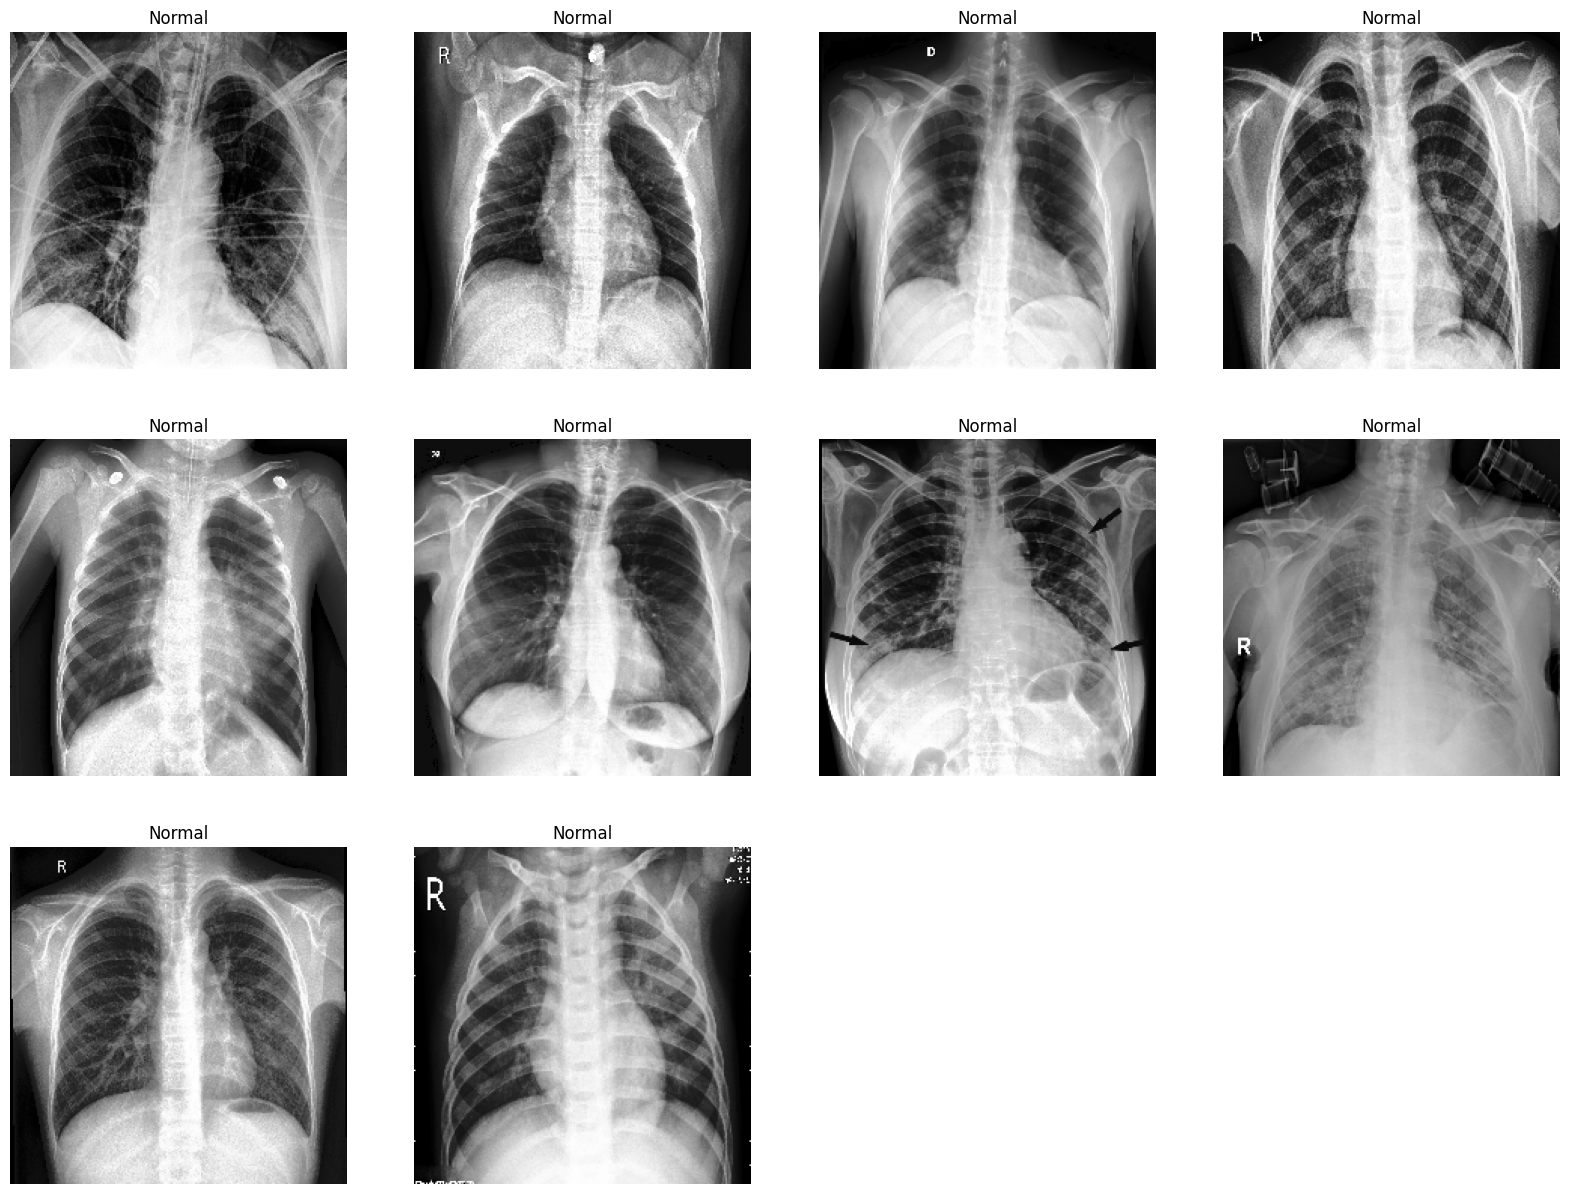

In [20]:
img_plots(train_gen,10)